In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker


In [2]:

distance_join_results = [
    {
        "Execution Type": "local_mac",
        "Distance Type": "haversine",
        "Distance in km": 10,
        "G2G Join Time": 29.165,
        "G2G Join Results": 2705663937,
        "G2E Join Time": 305.485,
        "G2E Join Results": 2421245439,
        "Total Exec Time": 391.185,
    },
    {
        "Execution Type": "local_mac",
        "Distance Type": "euclidean",
        "Distance in km": 10,
        "G2G Join Time": 26.756,
        "G2G Join Results": 2705663937,
        "G2E Join Time": 75.642,
        "G2E Join Results": 1926958898,
        "Total Exec Time": 173.314,
    },
    {
        "Execution Type": "local_okeanos",
        "Distance Type": "haversine",
        "Distance in km": 10,
        "G2G Join Time": 240.705,
        "G2G Join Results": 2705663937,
        "G2E Join Time": 1278.397,
        "G2E Join Results": 2421245439,
        "Total Exec Time": 1569.035,
    },
    {
        "Execution Type": "local_okeanos",
        "Distance Type": "euclidean",
        "Distance in km": 10,
        "G2G Join Time": 237.892,
        "G2G Join Results": 2705663937,
        "G2E Join Time": 381.572,
        "G2E Join Results": 1926958898,
        "Total Exec Time": 669.436,
    },
     {
        "Execution Type": "cluster_okeanos",
        "Distance Type": "haversine",
        "Distance in km": 10,
        "G2G Join Time": 154.020,
        "G2G Join Results": 2705663937,
        "G2E Join Time": 1091.828,
        "G2E Join Results": 2421245439,
        "Total Exec Time": 1328.170,
    },
    {
        "Execution Type": "cluster_okeanos",
        "Distance Type": "euclidean",
        "Distance in km": 10,
        "G2G Join Time": 137.479,
        "G2G Join Results": 2705663937,
        "G2E Join Time": 322.380,
        "G2E Join Results": 1926958898,
        "Total Exec Time": 543.867,
    }
]

In [3]:
df = pd.DataFrame(distance_join_results)
df

,Execution Type,Distance Type,Distance in km,G2G Join Time,G2G Join Results,G2E Join Time,G2E Join Results,Total Exec Time
0,local_mac,haversine,10,29.165,2705663937,305.485,2421245439,391.185
1,local_mac,euclidean,10,26.756,2705663937,75.642,1926958898,173.314
2,local_okeanos,haversine,10,240.705,2705663937,1278.397,2421245439,1569.035
3,local_okeanos,euclidean,10,237.892,2705663937,381.572,1926958898,669.436
4,cluster_okeanos,haversine,10,154.020,2705663937,1091.828,2421245439,1328.170
5,cluster_okeanos,euclidean,10,137.479,2705663937,322.380,1926958898,543.867


In [4]:
df["Total Results"] = df["G2G Join Results"] + df["G2E Join Results"]
df["Type"] = df["Execution Type"] + " "+ df["Distance Type"]
df

,Execution Type,Distance Type,Distance in km,G2G Join Time,G2G Join Results,G2E Join Time,G2E Join Results,Total Exec Time,Total Results,Type
0,local_mac,haversine,10,29.165,2705663937,305.485,2421245439,391.185,5126909376,local_mac haversine
1,local_mac,euclidean,10,26.756,2705663937,75.642,1926958898,173.314,4632622835,local_mac euclidean
2,local_okeanos,haversine,10,240.705,2705663937,1278.397,2421245439,1569.035,5126909376,local_okeanos haversine
3,local_okeanos,euclidean,10,237.892,2705663937,381.572,1926958898,669.436,4632622835,local_okeanos euclidean
4,cluster_okeanos,haversine,10,154.020,2705663937,1091.828,2421245439,1328.170,5126909376,cluster_okeanos haversine
5,cluster_okeanos,euclidean,10,137.479,2705663937,322.380,1926958898,543.867,4632622835,cluster_okeanos euclidean


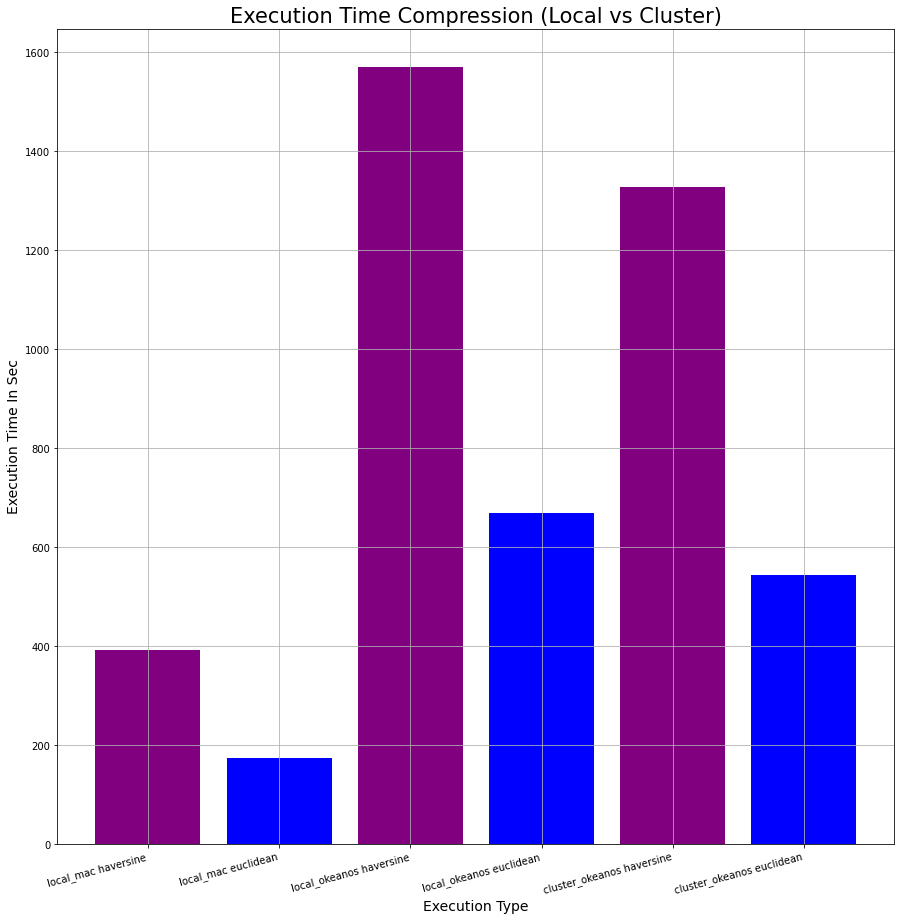

In [5]:
# df.sort_values(by='Execution Type', ascending=False, inplace=True)

fig = plt.figure(figsize = (15, 15))
New_Colors = ['purple','blue']#,'purple','brown','teal', 'yellow']

# creating the bar plot
plt.bar(df["Type"], df["Total Exec Time"], color = New_Colors)

plt.xticks(df["Type"],df["Type"], rotation=15, ha='right')
plt.xlabel("Execution Type", fontsize=14)
plt.ylabel("Execution Time In Sec",fontsize=14)
plt.title("Execution Time Compression (Local vs Cluster)",fontsize=21)
plt.grid(True)
plt.show()

In [6]:
distance_df = df.groupby("Distance Type").mean()
distance_df

,Distance in km,G2G Join Time,G2G Join Results,G2E Join Time,G2E Join Results,Total Exec Time,Total Results
Distance Type,,,,,,,
euclidean,10,134.042333,2705663937,259.864667,1926958898,462.205667,4632622835
haversine,10,141.296667,2705663937,891.903333,2421245439,1096.130000,5126909376


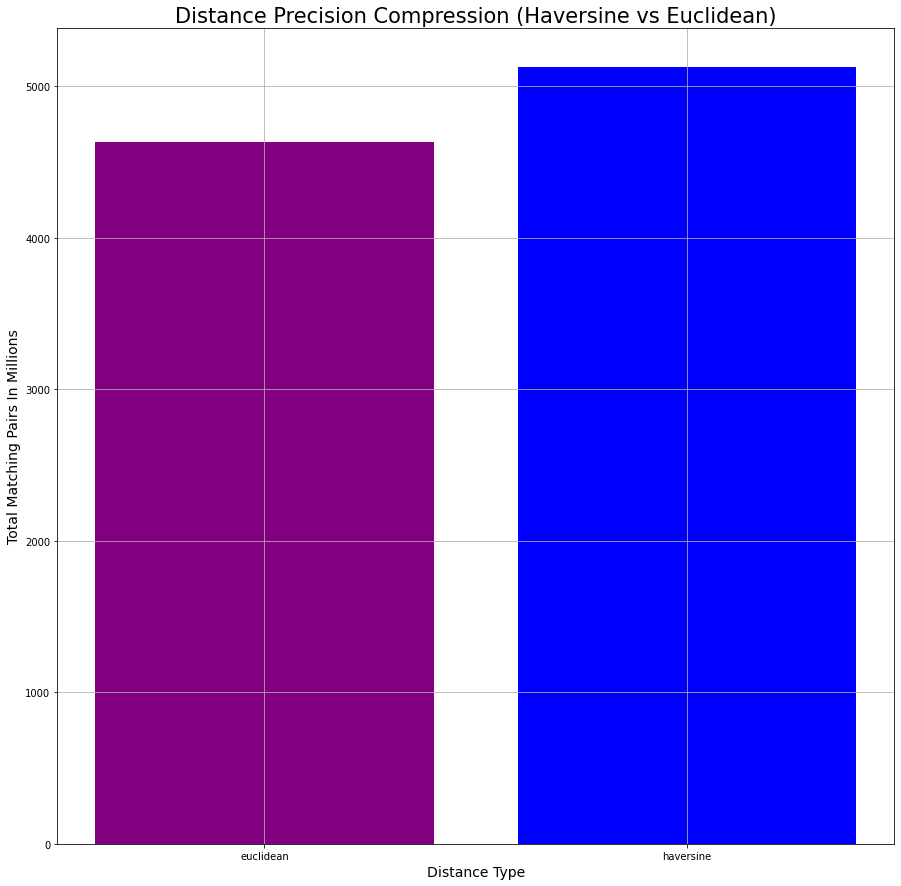

In [7]:
# fig = plt.figure(figsize = (15, 15))
fig, ax=plt.subplots(figsize = (15, 15))

New_Colors = ['purple','blue']#,'purple','brown','teal', 'yellow']

# creating the bar plot
plt.bar(distance_df.index, distance_df["Total Results"], color = New_Colors)
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1e6))
ax.yaxis.set_major_formatter(ticks_y)
plt.xlabel("Distance Type", fontsize=14)
plt.ylabel("Total Matching Pairs In Millions",fontsize=14)
plt.title("Distance Precision Compression (Haversine vs Euclidean)",fontsize=21)
plt.grid(True)
plt.show()

In [9]:
df.to_excel(r'/Users/thanoskottaridis/Documents/metaptixiako_files/main lectures/b_eksamino/Big-data-practices-and-tools/final_project/report/DistanceJoin_Results.xlsx', index = False)